# **W2D4 Tutorial 1: Distributions**

**Week 2, Day 4, Extremes & Vulnerability**

**Content creators:** Matthias Aengenheyster, Joeri Reinders

**Content reviewers:** Peter Ohue, Derick Temfack, Zahra Khodakaramimaghsoud, Peizhen Yang, Younkap Nina Duplex, Laura Paccini, Agustina Pesce, Sloane Garelick, Cheng Zhang, Jenna Pearson, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS

# **Tutorial Objectives:**

In this initial tutorial, our focus will be on examining the distribution of annual extreme precipitation levels in Germany. Our objective is to explore various aspects of the distribution, including the mean, variance, and skewness. By the end of this tutorial, you will be able to:

- Visualize an observational record as both a timeseries and a distribution.
- Compute the *moments* of a record.
- Generate and plotting a distribution with predefined *moments*.

# **Setup**

In [18]:
# Installs

In [23]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import pooch
from scipy import stats

In [ ]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

In [ ]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

# **Section 1: Inspect the precipitation record and plot it over time**

In [9]:
# download file: 'precipitationGermany_1920-2022.csv'
url_precipitationGermany = "https://osf.io/xs7h6/download"


data = pd.read_csv(pooch.retrieve(url_precipitationGermany, known_hash=None),
                   index_col=0).set_index('years')
data.columns=['precipitation']
precipitation = data.precipitation

In [10]:
precipitation

years
1920    24.5
1921    27.7
1922    15.6
1923    23.5
1924    59.9
        ... 
2018    31.6
2019    24.9
2020    33.3
2021    57.4
2022    25.4
Name: precipitation, Length: 103, dtype: float64

Text(0, 0.5, 'precipitation')

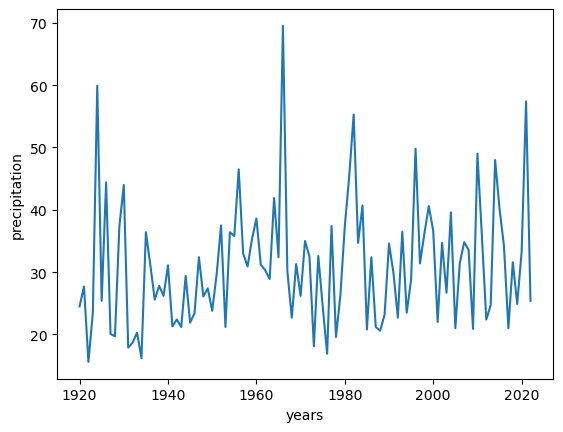

In [13]:
precipitation.plot()#(x='years',y='rr')
plt.ylabel('precipitation')

Now plot a histogram of the data. Recall that we can make a histogram of this data by plotting the y-axis from the previous figure on the x-axis of this new figure versus the count of how many data points fall within a 'bin' on the x-axis. 

Text(0.5, 0, 'precipitation')

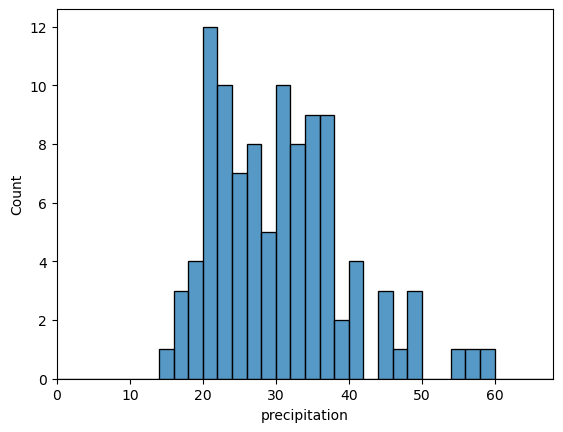

In [14]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins)
plt.xlim(bins[0],bins[-1])
plt.xlabel('precipitation')

Next compute the mean, the variance and the standard deviation of our precipitation data. Plot the mean as a vertical line in the histogram

In [15]:
mean_pr = precipitation.mean()
var_pr = precipitation.var()
std_pr = precipitation.std()

In [16]:
mean_pr, var_pr, std_pr

(30.97184466019418, 98.55047401484866, 9.927259139100212)

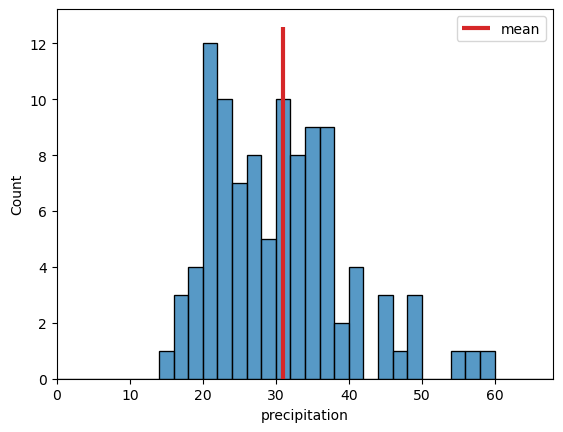

In [18]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins)
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3,label='mean')
plt.xlabel('precipitation')
plt.legend()

As you can observe, the range of values on either side of the line is unequal, indicating a potential skewed distribution. To assess the extent of the potential skewness, let's examine the data more closely. We can also generate a set of 100 random values from a normal distribution (mean = 0, standard deviation = 1) and compare its skewness to that of the precipitation data.

# ohad comment: daily precipitation is usually lognormal distrubtion. which is why the yearly is skewed. if you average lognormal enough, you will get normal (or a single point :) ). 
# what bothers me is that there is no mention of this in the text. 


In [19]:
precipitation.skew()

1.1484425874858337

In [20]:
data['random'] = np.random.normal(0,1,size=data.index.size)

In [26]:
data.skew()

precipitation    1.148443
random           0.103865
lognormal        2.815234
dtype: float64

As evident from the data, the skewness of our precipitation data is significantly larger compared to the data extracted from a normal distribution. To delve deeper into this observation, we can proceed by fitting a normal distribution to our precipitation data. This entails computing the mean and standard deviation of the 'precipitation' variable, which serve as the two parameters for a normal distribution. By utilizing the `scipy` function norm.pdf, we can generate a probability density function (pdf) that accompanies our histogram. The pdf provides insight into the probability of encountering various levels of precipitation based on the available data. As expected, the mean value exhibits the highest probability.

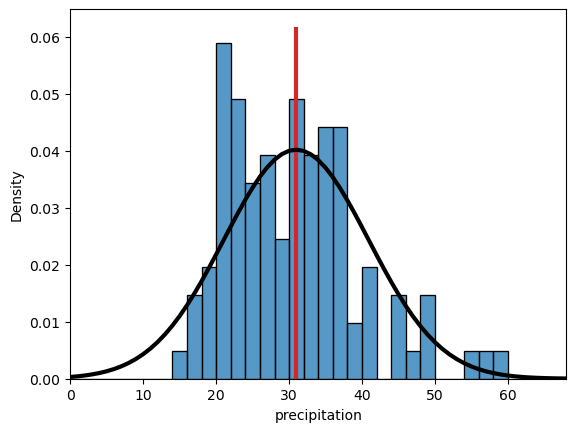

In [29]:
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,stat='density')
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3)

x = np.arange(0,100,1)
plt.plot(x,stats.norm.pdf(x,mean_pr,std_pr),c='k',lw=3)

## Coding exercise: Add uncertainty bands to the distribution
1. Create 1000 records of 100 samples each that are drawn from a normal distribution with the mean and standard deviation of the precipitation record
2. Compute the 5-th and 95-th percentiles across the 1000-member ensemble and add them to the figure above to get an idea of the uncertainty.

Hint: you can use the function `np.random.normal` to draw from a normal distribution. Call `np.random.normal` or `help(np.random.normal)` to understand how to use it. `np.quantile` is useful for computing quantiles. 

In [ ]:
#################################################
# Students: Fill in missing code (...) and comment or remove the next line
random_samples = np.random.normal(...)

In [ ]:
#################################################
# Students: Fill in missing code (...) and comment or remove the next line
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,stat='density')
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3)

x = np.arange(0,100,1)
plt.plot(x,stats.norm.pdf(x,mean_pr,std_pr),c='k',lw=3)

plt.plot(x, ...) # 95-th percentile
plt.plot(x, ...) # 5-th percentile

In [37]:
# to_remove solution
random_samples = np.random.normal(mean_pr,std_pr,size=[100,1000])
pdfs = np.zeros([x.size,1000])

for i in range(1000):
    pdfi = stats.norm.pdf(x,random_samples[:,i].mean(),random_samples[:,i].std())
    pdfs[:,i] = pdfi

array([[9.51743358e-04, 4.68089739e-04, 4.82485828e-04, ...,
        3.41810148e-04, 5.59788229e-04, 1.72059918e-04],
       [1.20808347e-03, 6.25117306e-04, 6.45803296e-04, ...,
        4.59268790e-04, 7.23277131e-04, 2.47670922e-04],
       [1.52109150e-03, 8.26714361e-04, 8.55833999e-04, ...,
        6.11248130e-04, 9.26940176e-04, 3.52130226e-04],
       ...,
       [4.39001993e-10, 1.32582168e-11, 6.62831035e-12, ...,
        5.51405314e-11, 1.22454513e-09, 3.90621564e-14],
       [2.53939603e-10, 6.87050439e-12, 3.37563858e-12, ...,
        2.94448864e-11, 7.18551304e-10, 1.69570421e-14],
       [1.45705413e-10, 3.52576763e-12, 1.70209043e-12, ...,
        1.55746196e-11, 4.18221899e-10, 7.27071221e-15]])

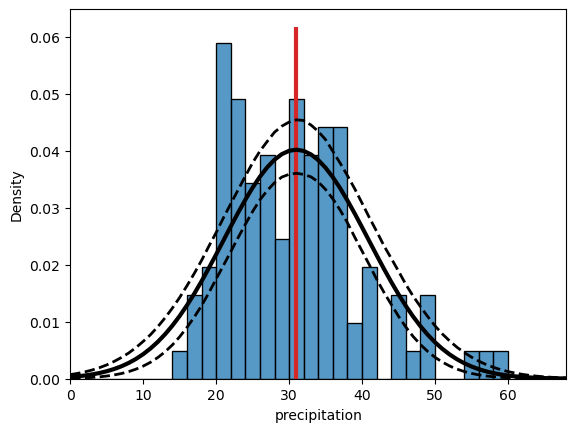

In [38]:
# to_remove solution
bins=np.arange(0,precipitation.max(),2)
sns.histplot(precipitation,bins=bins,stat='density')
plt.xlim(bins[0],bins[-1])

ylim = plt.ylim()

plt.vlines(mean_pr,ymin=ylim[0],ymax=ylim[1],color='C3',lw=3)

x = np.arange(0,100,1)
plt.plot(x,stats.norm.pdf(x,mean_pr,std_pr),c='k',lw=3)

plt.plot(x, np.quantile(pdfs,0.95,axis=1),'--',lw=2,color='k')
plt.plot(x, np.quantile(pdfs,0.05,axis=1),'--',lw=2,color='k')

## Question:
1. Based on the current plot, does a normal distribution accurately describe your model? Why or why not? 

In [2]:
# to_remove explanation
"""
You've generated an ensemble of 1000 records, each with 100 samples drawn from a normal distribution with the same mean and standard deviation as your precipitation data. You've then computed the 5th and 95th percentiles across this ensemble to try to capture the uncertainty in the precipitation data. These percentiles are still symmetric, but the precipitation data is slightly right-skewed. You might consider using a different distribution that can capture this right-skewness. For example, the log-normal distribution is a common choice for right-skewed data.
"""

"\nYou've generated an ensemble of 1000 records, each with 100 samples drawn from a normal distribution with the same mean and standard deviation as your precipitation data. You've then computed the 5th and 95th percentiles across this ensemble to try to capture the uncertainty in the precipitation data. These percentiles are still symmetric, but the precipitation data is slightly right-skewed. You might consider using a different distribution that can capture this right-skewness. For example, the log-normal distribution is a common choice for right-skewed data.\n"

# **Summary**
In this tutorial, we focused on the analysis of annual extreme precipitation levels in Germany. We started by visualizing the observational record as both a timeseries and a distribution. This led us to compute the moments of the record, specifically, the mean, variance, and standard deviation. By plotting the mean on a histogram, we noticed a potential skewed distribution. To explore this, we compared the skewness of the precipitation data to a normally distributed set of values.